In [1]:
import pandas as pd
import numpy as np
scores = pd.read_csv('scores.csv')
question_bank = pd.read_csv('question_bank.csv')
scores = pd.merge(question_bank,scores).drop(['genres','timestamp'],axis=1)
print(scores.shape)
scores.head()

(5000, 4)


,questionId,question,userId,score
0,1,When will you hand ____ your assignment?,1,3
1,1,When will you hand ____ your assignment?,2,0
2,1,When will you hand ____ your assignment?,3,2
3,1,When will you hand ____ your assignment?,4,3
4,1,When will you hand ____ your assignment?,5,2


In [2]:
userScores=scores.pivot_table(index=['userId'],columns=['question'],values='score')
userScores.head()


question,The Opium war id held between which two countries?,'Not bene' means –,A constitutional monarchy provides what power to a monarch?,A speed limit is the _________ legal speed that you can travel on the road.,AFTER: BEFORE:,"After _____________ smoking, they let the cigarette fall on the wood floor.",All of us are devoted ________ one another.,An interest group hires lobbyists to,Antonym of DENIGRATE is _____________?,CATTLE : DROVE : :,...,Who is known as Man of Blood and Iron?,Who is the First Test Tube Twins Babies in the World?,Who made the first chocolate bar?,"Who said that "" Man is a political animal""?",Who was among the famous Roman poets?,Who was the modern world's first woman head of government?,Whose winter residence did potala palace serve as till 1959?,"Young Italy movement by led by two revolutionaries, One was Mazzini"" and Other was?""",___________you wake me up so early on a Sunday?,"_________the rain forests is very important, if we do not want the flora and fauna found there to become extinct."
userId,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,2,2,2,4,5,0,2,...,0,1,5,5,3,5,1,0,3,5
2,3,0,2,1,2,3,4,3,0,0,...,1,1,4,3,5,2,4,5,1,5
3,2,5,3,0,0,0,4,5,2,0,...,0,1,0,4,0,5,1,2,3,1
4,1,4,1,0,3,4,1,4,3,5,...,1,1,0,0,5,4,3,4,0,4
5,3,3,0,1,3,4,1,3,0,3,...,1,0,0,1,2,3,5,0,1,2


In [3]:
userScores = userScores.dropna(thresh=10, axis=1).fillna(0,axis=1)
userScores.head()

question,The Opium war id held between which two countries?,'Not bene' means –,A constitutional monarchy provides what power to a monarch?,A speed limit is the _________ legal speed that you can travel on the road.,AFTER: BEFORE:,"After _____________ smoking, they let the cigarette fall on the wood floor.",All of us are devoted ________ one another.,An interest group hires lobbyists to,Antonym of DENIGRATE is _____________?,CATTLE : DROVE : :,...,Who is known as Man of Blood and Iron?,Who is the First Test Tube Twins Babies in the World?,Who made the first chocolate bar?,"Who said that "" Man is a political animal""?",Who was among the famous Roman poets?,Who was the modern world's first woman head of government?,Whose winter residence did potala palace serve as till 1959?,"Young Italy movement by led by two revolutionaries, One was Mazzini"" and Other was?""",___________you wake me up so early on a Sunday?,"_________the rain forests is very important, if we do not want the flora and fauna found there to become extinct."
userId,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,2,2,2,4,5,0,2,...,0,1,5,5,3,5,1,0,3,5
2,3,0,2,1,2,3,4,3,0,0,...,1,1,4,3,5,2,4,5,1,5
3,2,5,3,0,0,0,4,5,2,0,...,0,1,0,4,0,5,1,2,3,1
4,1,4,1,0,3,4,1,4,3,5,...,1,1,0,0,5,4,3,4,0,4
5,3,3,0,1,3,4,1,3,0,3,...,1,0,0,1,2,3,5,0,1,2


In [4]:
print("Before: ",userScores.shape)
#userRatings.fillna(0,inplace=True)
print("After: ",userScores.shape)


Before:  (50, 100)
After:  (50, 100)


In [5]:
corrMatrix = userScores.corr(method='pearson')
corrMatrix.head(100)
print(corrMatrix.head(100))

question                                             The Opium war id held between which two countries?  \
question                                                                                                  
 The Opium war id held between which two countr...                                           1.000000     
'Not bene' means –                                                                           0.168856     
A constitutional monarchy provides what power t...                                           0.159265     
A speed limit is the _________ legal speed that...                                          -0.186160     
AFTER: BEFORE:                                                                               0.133999     
...                                                                                               ...     
Who was the modern world's first woman head of ...                                          -0.046273     
Whose winter residence did potala pal

[100 rows x 100 columns]


In [6]:
def get_similar_questions(question,score):
    similar_scores = corrMatrix[question]*(score-2.5)
    similar_scores = similar_scores.sort_values(ascending=False)
    print(type(similar_scores))
   
    return similar_scores
   

In [7]:
english_lover = [("When will you hand ____ your assignment?",5)]

similar_questions = pd.DataFrame()

for question,score in english_lover:
    similar_questions = similar_questions.append(get_similar_questions(question,score),ignore_index = True)
    
similar_questions.head(10)
       

<class 'pandas.core.series.Series'>


,The Opium war id held between which two countries?,'Not bene' means –,A constitutional monarchy provides what power to a monarch?,A speed limit is the _________ legal speed that you can travel on the road.,AFTER: BEFORE:,"After _____________ smoking, they let the cigarette fall on the wood floor.",All of us are devoted ________ one another.,An interest group hires lobbyists to,Antonym of DENIGRATE is _____________?,CATTLE : DROVE : :,...,Who is known as Man of Blood and Iron?,Who is the First Test Tube Twins Babies in the World?,Who made the first chocolate bar?,"Who said that "" Man is a political animal""?",Who was among the famous Roman poets?,Who was the modern world's first woman head of government?,Whose winter residence did potala palace serve as till 1959?,"Young Italy movement by led by two revolutionaries, One was Mazzini"" and Other was?""",___________you wake me up so early on a Sunday?,"_________the rain forests is very important, if we do not want the flora and fauna found there to become extinct."
0,-0.612845,-0.029879,-0.083841,1.098991,0.329447,0.425255,-1.231378,-1.052084,0.425769,0.463757,...,0.320879,0.621558,-0.397438,0.009077,0.232384,-0.0174,0.76877,-0.579595,0.942689,0.632876


In [8]:
 similar_questions.sum().sort_values(ascending=False).head(10)

When will you hand ____ your assignment?                                                          2.500000
It is certain that human beings ______ latent power of which they are only vaguely aware.         1.120851
Labor unions were largely responsible for                                                         1.099557
A speed limit is the _________ legal speed that you can travel on the road.                       1.098991
The Peloponnesian war' was fought between _______ and _____.                                      1.049625
The earliest Chinese civilization of which archaeologists tell us in the _______ civilization.    1.030722
Which year is associated with the Boston Tea Party?                                               0.970243
___________you wake me up so early on a Sunday?                                                   0.942689
I assume ______________with me.                                                                   0.941786
The lion sprang____________the buffal

In [9]:
gk_lover = [("Who was among the famous Roman poets?",5),
            ("Russian revolutionary, who founded the Communist Party was",4),
            ("Which state to be 1st state to legalize mask-wearing?",1)]
similar_questions = pd.DataFrame()
for question,score in gk_lover:
    similar_questions = similar_questions.append(get_similar_questions(question,score),ignore_index = True)

similar_questions.head(20)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,The Opium war id held between which two countries?,'Not bene' means –,A constitutional monarchy provides what power to a monarch?,A speed limit is the _________ legal speed that you can travel on the road.,AFTER: BEFORE:,"After _____________ smoking, they let the cigarette fall on the wood floor.",All of us are devoted ________ one another.,An interest group hires lobbyists to,Antonym of DENIGRATE is _____________?,CATTLE : DROVE : :,...,Who is known as Man of Blood and Iron?,Who is the First Test Tube Twins Babies in the World?,Who made the first chocolate bar?,"Who said that "" Man is a political animal""?",Who was among the famous Roman poets?,Who was the modern world's first woman head of government?,Whose winter residence did potala palace serve as till 1959?,"Young Italy movement by led by two revolutionaries, One was Mazzini"" and Other was?""",___________you wake me up so early on a Sunday?,"_________the rain forests is very important, if we do not want the flora and fauna found there to become extinct."
0,0.187403,-0.340660,-0.021759,-0.329123,0.485605,0.438935,-0.514536,-0.046629,0.045555,0.868292,...,-0.433665,0.397456,0.463307,-0.018197,2.500000,2.170297e-01,0.587515,0.574151,0.196139,-0.188635
1,0.521511,-0.148039,-0.069233,-0.235419,0.140825,0.099851,0.600982,0.650110,-0.152957,-0.195871,...,-0.444510,-0.346213,0.351126,-0.035980,0.153104,9.925546e-18,-0.208798,0.129974,-0.231500,-0.143627
2,-0.281869,0.024131,0.232154,0.326864,0.112688,0.187394,-0.178431,-0.150285,-0.116352,0.049974,...,0.168286,0.333867,-0.001929,-0.222867,-0.390534,-1.124181e-01,0.367163,-0.118782,0.340739,0.215095


In [10]:
userScores.describe()



question,The Opium war id held between which two countries?,'Not bene' means –,A constitutional monarchy provides what power to a monarch?,A speed limit is the _________ legal speed that you can travel on the road.,AFTER: BEFORE:,"After _____________ smoking, they let the cigarette fall on the wood floor.",All of us are devoted ________ one another.,An interest group hires lobbyists to,Antonym of DENIGRATE is _____________?,CATTLE : DROVE : :,...,Who is known as Man of Blood and Iron?,Who is the First Test Tube Twins Babies in the World?,Who made the first chocolate bar?,"Who said that "" Man is a political animal""?",Who was among the famous Roman poets?,Who was the modern world's first woman head of government?,Whose winter residence did potala palace serve as till 1959?,"Young Italy movement by led by two revolutionaries, One was Mazzini"" and Other was?""",___________you wake me up so early on a Sunday?,"_________the rain forests is very important, if we do not want the flora and fauna found there to become extinct."
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.500000,2.800000,2.640000,2.560000,3.000000,2.740000,2.400000,2.400000,2.020000,2.460000,...,2.180000,2.440000,2.66000,2.50000,2.880000,2.700000,3.120000,2.420000,2.380000,2.820000
std,1.359021,1.511858,1.508615,1.774651,1.456863,1.382249,1.737932,1.577909,1.316923,1.752083,...,1.560874,1.540739,1.89101,1.55511,1.802945,1.460361,1.768661,1.750685,1.627443,1.662184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.00000,1.00000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.00000,2.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,3.750000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,3.750000,4.000000,4.00000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
similar_questions.sum().sort_values(ascending=False).head(20)

Who was among the famous Roman poets?                                                              2.262570
Complete the sentence with appropriate words: The Tajmahal as said --- built by Shahjahan.         1.343003
Russian revolutionary, who founded the Communist Party was                                         1.243935
Do not stay in the grasslands after dark, as some animals become _________when they see humans.    1.141233
The schools which taught primary education to Muslims during the period of sultanate               0.989478
In the test, we will _________ your work and then give you detailed feedback.                      0.967940
Where is the 'Pearl Harbour' located?                                                              0.943179
Who made the first chocolate bar?                                                                  0.812503
The song in the play cannot be deleted as it is _________to the story.                             0.781879
Who among the following emph

In [12]:
similar_questions.sum().sort_values(ascending=True).head(10)

Who is also known as the founder of scientific socialism?             -1.232492
She remained a __________all her life.                                -1.159756
Who among the following devised the method of making 'Pakka' roads?   -0.901316
There is quite tenuous evidence _________it.                          -0.876660
The lion sprang____________the buffaloes.                             -0.760966
The Peloponnesian war' was fought between _______ and _____.          -0.713354
Who is known as Man of Blood and Iron?                                -0.709889
Ideal businessman is he who ---.                                      -0.678962
The building is not safe and must be ___________down.                 -0.637058
That was __________movie I have ever seen.                            -0.635930
dtype: float64

In [13]:
from datetime import datetime
start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))



Duration: 0:00:00


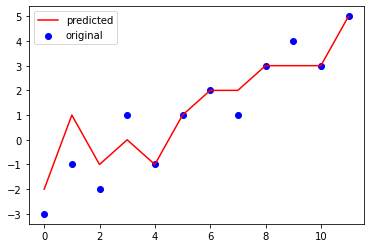

Results by manual calculation:
MAE: 0.5833333333333334
MSE: 0.75
RMSE: 0.8660254037844386
R-Squared: 0.8655043586550436
Results of sklearn.metrics:
MAE: 0.5833333333333334
MSE: 0.75
RMSE: 0.8660254037844386
R-Squared: 0.8655043586550436


In [14]:

import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y = np.array([-3, -1, -2, 1, -1, 1, 2, 1, 3, 4, 3, 5])
yhat = np.array([-2, 1, -1, 0, -1, 1, 2, 2, 3, 3, 3, 5])
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

# calculate manually
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)